# Introduction

In this challenge, we are given a list of users along with their demographics, web session records, and some summary statistics. We are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

The training and test sets are split by dates. In the test set, we will predict all the new users with first activities after 7/1/2014. 

The datasets are:

1- train_users.csv - the training set of users <br>
2- test_users.csv - the test set of users
* id: user id
* date_account_created: the date of account creation
* timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
* date_first_booking: date of first booking
* gender
* age
* signup_method
* signup_flow: the page a user came to signup up from
* language: international language preference
* affiliate_channel: what kind of paid marketing
* affiliate_provider: where the marketing is e.g. google, craigslist, other
* first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
* signup_app
* first_device_type
* first_browser
* country_destination: this is the target variable you are to predict

We will go through the following steps:
* Fetch Airbnb data from https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data
* Merge the test_users.csv and train_users2.csv
* Clean the data
* Collect the data in a panda dataframe
* Display the data
* Explore the new Dataframe
* Explore other data sets
* Create Assumptions, develope hypothesis, and create relationship
* Build Predictive Model

We will also show the different sub-steps that can be taken to reach the presented solution.

As we begin the study, we first need to ensure that the datasets are clean and that all irrelevant parts are removed or filled correctly.



In [16]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np # library for working with Arrays
import pandas as pd # makes working with data tables easier
import matplotlib.pyplot as plt # module for plotting
import seaborn as sns #

# set figure aesthetics
sns.set_context("poster", font_scale=1.1)

# Load the data into DataFrames
train_users = pd.DataFrame(pd.read_csv("train_users_2.csv")) # Use the training set to build model
test_users = pd.DataFrame(pd.read_csv("test_users.csv")) # Use the test set to validate model

We checked both train_users and test_users to understand the content of the data. 
The results of the analysis are as followed:
* The attributes of both data sets are similar
* There is 1 additional column that is different in the train_users.csv data set titled country_destination
* There are many irrelevant parts that needs to be resolved in the data sets

In [17]:
test_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
7,tkpq0mlugk,2014-07-01,20140701000649,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
8,3xtgd5p9dn,2014-07-01,20140701000837,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
9,md9aj22l5a,2014-07-01,20140701002245,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


In [18]:
train_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


# Merging
From the analysis we can deduce that the test_users is an extension from the train_users dataset. Therefore we can merge the datasets to streamline the data cleaning phase.

In [19]:
# We are adding value NDF to elements where the country destination was not filled for the test data
#test_users["country_destination"] = "NDF"

# Merge train and test users
frames = [train_users, test_users]
users = pd.concat((frames), axis=0, ignore_index=True)

In [20]:
users

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,osr2jwljor,en,Web,0,basic,20100101215619
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0,basic,20100102012558
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,0d01nltbrs,en,Web,0,basic,20100103191905
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,a1vcnhxeij,en,Web,0,basic,20100104004211
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,6uh8zyj2gn,en,Web,0,basic,20100104023758


# Basic Analysis of Data

From just looking at the data after the merge, we will now check for data inconsistency. Just by observation we can can assume that NaN and unknown are homologous meaning that no values were entered for those columns during booking. We will now check the data types for each attribute in the dataframe. Then we will calculate the percentage of Null values in each column to provide direction when we begin to clean the data.



In [21]:
# returns data types for each attribute of the dataset
users.dtypes

affiliate_channel           object
affiliate_provider          object
age                        float64
country_destination         object
date_account_created        object
date_first_booking          object
first_affiliate_tracked     object
first_browser               object
first_device_type           object
gender                      object
id                          object
language                    object
signup_app                  object
signup_flow                  int64
signup_method               object
timestamp_first_active       int64
dtype: object

In [22]:
# returns the number of rows and columns
users.shape

(275547, 16)

### Learning Code Module 1

* .isnull() is a function that identifies all the null values in the users dataframe and returns a boolean value
* .sum() sums all the boolean values that returns true
* .shape returns the number of rows and columns; while applying [0] to .shape as .shape[0] will return the starting index of rows

Therefore the line of code below means; for all Null values that return True in the users Dataframe for each column, sum the values that are True and divide by the number of rows in each designated column

In [23]:
# returns percentage of Null values in each column
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan

affiliate_channel           0.000000
affiliate_provider          0.000000
age                        42.412365
country_destination        22.535538
date_account_created        0.000000
date_first_booking         67.733998
first_affiliate_tracked     2.208335
first_browser               0.000000
first_device_type           0.000000
gender                      0.000000
id                          0.000000
language                    0.000000
signup_app                  0.000000
signup_flow                 0.000000
signup_method               0.000000
timestamp_first_active      0.000000
dtype: float64

# Brief Observation and Questions to Consider

The following columns have NULL values:
* age
* country_destination
* data_first_booking
* first_affiliate_tracked

Some questions to consider as we proceed on cleaning the users Dataframe:
* Does age have any relationship with the country destination?
* Does age and gender have any relationship with country destination?
* Why does age and date of first booking have the highest percentage of null values?
* What other possible elements could drive users to choose a destination country?

# Cleaning Data

Before we observed the frequency of the Null values in each of the columns and now we have applied values to represent to represent them. This action was completed so that we may be able to develop models on the complete set of users to easily identify patterns as we proceed with the analysis.

The values added to the Null values are as followed:
* Age >> 0
* dountry_destination >> NDF
* date_first_booking >> -unknown-
* first_affiliate_tracked >> untracked

In [24]:
users["age"] = users["age"].fillna(0)
users["country_destination"] = users["country_destination"].fillna("NDF")
users["date_first_booking"] = users["date_first_booking"].fillna("-unknown-")
users["first_affiliate_tracked"] = users["first_affiliate_tracked"].fillna("untracked")

In [26]:
# returns percentage of Null values in each column
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan

affiliate_channel          0.0
affiliate_provider         0.0
age                        0.0
country_destination        0.0
date_account_created       0.0
date_first_booking         0.0
first_affiliate_tracked    0.0
first_browser              0.0
first_device_type          0.0
gender                     0.0
id                         0.0
language                   0.0
signup_app                 0.0
signup_flow                0.0
signup_method              0.0
timestamp_first_active     0.0
dtype: float64

# Hypothesis

We believe that these unseen characteristics(age, gender, timestamp first active, signup flow, affiliate provider, date account create and date of first booking) have a direct influence on the country of travel. We will illustrate these characteristics in various diagrams and then we will perform a cross analysis to explore the possible combination of influences to see if the results effect the decision of country of travel.


# Data Visualization

## >> Understanding Age <<

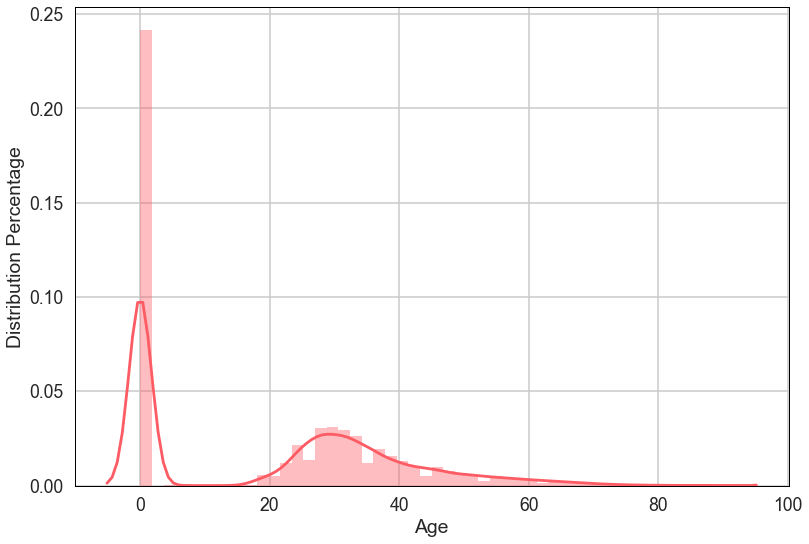

In [60]:
sns.distplot(users.age, color='#FD5C64')
plt.xlabel('Age')
plt.ylabel('Distribution Percentage')

This distribution plot illustrates the percetange of the total population of users.
<br>
<br>
Note: It can be observed that there is still inconsistencies with our data due to the age range extending to 1000+. So we will assume that life expectancy ends at the age of 90 and any values above 90 will be converted to 0.

In [61]:
users["age"][users["age"] > 90] = 0

C:\Users\Tom Tran\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


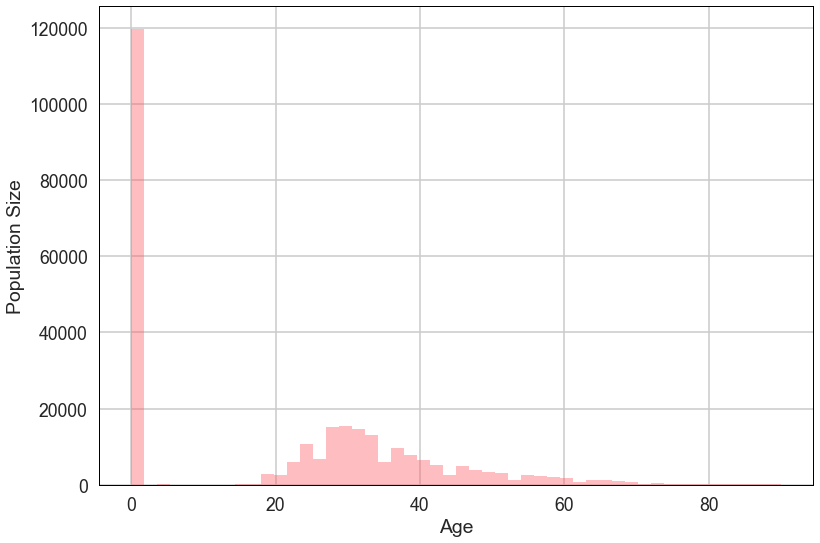

In [62]:
sns.distplot(users.age, kde=False, color='#FD5C64')
plt.xlabel('Age')
plt.ylabel('Population Size')

Remember that 0 indicates all NULL entries and entries that exceed the age of 90. However, because of total count of the zeros and the frequency at which users input their age for their first booking we gain further understanding that age does not influence the decision to choose a specific destination. 

## >> Understanding Gender <<

In [63]:
users["gender"].value_counts()

0        129480
2         77524
1         68209
OTHER       334
Name: gender, dtype: int64

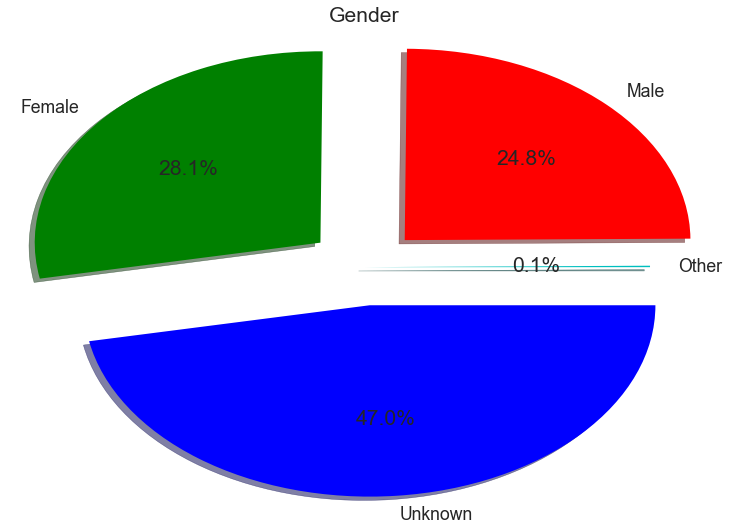

In [64]:
# the portion you want to dedicate to each value
values = [129480, 77524, 68209, 334]
colors = ['b', 'g', 'r', 'c']
labels = ['Unknown', 'Female', 'Male', 'Other']
# move the second value section out of the chart. The higher the number the farther it gets moved
explode = (0.2, 0.2, 0.2, 0)

# autopct the %.1f is Python formating and %% used to show as percent
plt.pie(values, colors=colors, labels=labels, 
        explode=explode, autopct='%.1f%%',
        counterclock=False, shadow=True)
plt.title('Gender')

plt.show()

This pie chart illustrates the distribution of users between female, male, other, and unknown. "Other" indicates users that do not want to identify themselves as male or female and Unknown indicates users that have not enter any value for the gender category.

## >> Understanding Country Destination in relation to Gender <<

In [48]:
# Updating the users dataframe column that contains gender with values.
# Unknown: 0
# Male: 1
# Female: 2
users.gender.replace('-unknown-',0, inplace=True)
users.gender.replace('MALE',1, inplace=True)
users.gender.replace('FEMALE',2, inplace=True)

Utilization of the replace function is needed to change the string to numerical integer so that we can perform a summation. After, we can then convert the country destination into numerical integer.

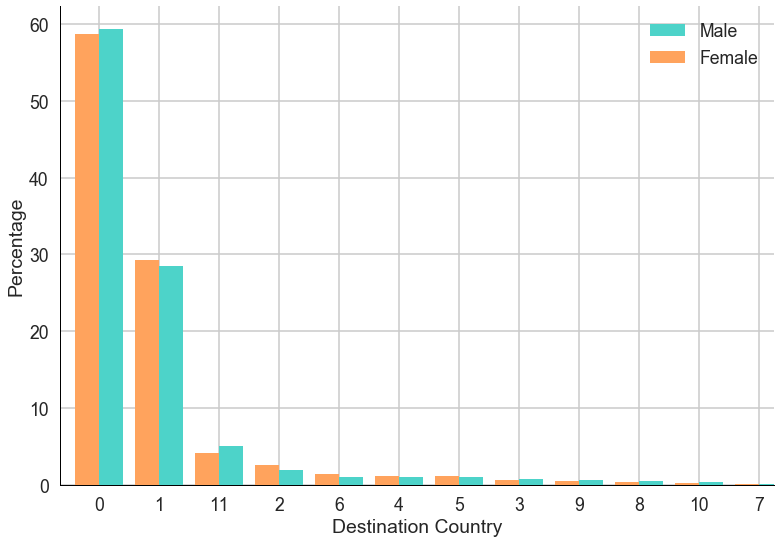

In [84]:
# Displays the travel percentage of the male and females to the various countries
women = sum(users['gender'] == 2)
men = sum(users['gender'] == 1)


female_destinations = users.loc[users['gender'] == 2, 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 1, 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

Note: From a quick observation we can see that gender in another characteristic that does not influence on choice of destination. But because unknown values encompasses 47% of the data results, we must all see if the unknown category changes the decision result.

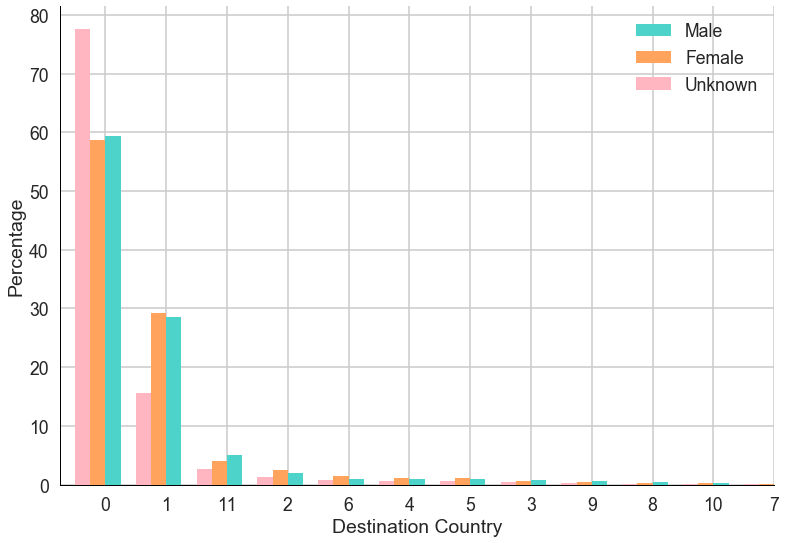

In [85]:
# Displays the travel percentage of the male and females to the various countries
women = sum(users['gender'] == 2)
men = sum(users['gender'] == 1)
unknown = sum(users['gender'] == 0)

female_destinations = users.loc[users['gender'] == 2, 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 1, 'country_destination'].value_counts() / men * 100
unknown_destinations = users.loc[users['gender'] == 0, 'country_destination'].value_counts() / unknown * 100

# Bar width
width = 0.25

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)
unknown_destinations.plot(kind='bar', width=width, color='#FFB6C1', position=2, label='Unknown', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

Note: Because the unknown category did not present any major influences, it is safe to assume that there is no correlation between gender and country destination. 

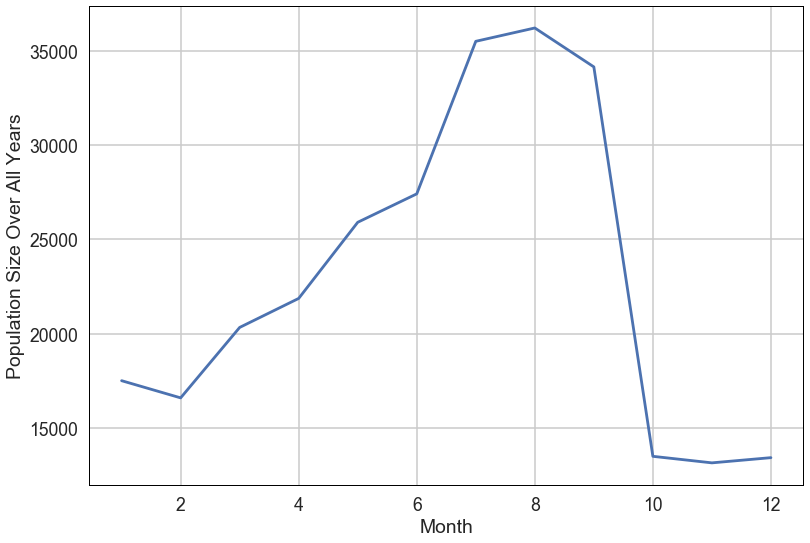

In [65]:
users.date_account_created.values

monthNum = []

Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

for i in range (0, len(users.date_account_created.values)):
    monthNum.append(users.date_account_created.values[i][5:7])
#print(monthNum)
for j in range(0, len(monthNum)):
    if monthNum[j] == "01":
        Jan += 1
    elif monthNum[j] == "02":
        Feb += 1
    elif monthNum[j] == "03":
        Mar += 1
    elif monthNum[j] == "04":
        Apr += 1
    elif monthNum[j] == "05":
        May += 1
    elif monthNum[j] == "06":
        Jun += 1
    elif monthNum[j] == "07":
        Jul += 1
    elif monthNum[j] == "08":
        Aug += 1
    elif monthNum[j] == "09":
        Sep += 1
    elif monthNum[j] == "10":
        Oct += 1
    elif monthNum[j] == "11":
        Nov += 1
    else:
        Dec += 1

y = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("Population Size Over All Years")
plt.show()

This chart is used to see if seasons effect destination of travel.

# Further Investigation for Future Research
* Understanding date_account_created 
* Understanding of date of first booking
* Understanding timestamp first active
* Understanding signup flow
* Understanding of date of first booking
* Understanding affiliate provider

# Creation of Decision Tree

In this section of code, we will begin to analyze the details contained with the .csv file and formulate a determination about the countries that a user will likely travel to next. It is evidenced through the above figure that users are primarily booking reservations in the US or not booking a reservation at all.

Of the possible destination countries of travel ('US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF','other'), we can derive from the figure above that the difference between male and female travel destinations are almost evenly distributed.
Since there isn't much variance, we will add elements of age to determine if it has any significance on the output of the data

In [73]:
# Import 'tree' from scikit-learn library
from sklearn import tree

Note: check the data types because a Decision Tree requires numbers to perform a prediction. Alter data types to perform prediction against different parameters.

In [74]:
users.dtypes

affiliate_channel           object
affiliate_provider          object
age                        float64
country_destination         object
date_account_created        object
date_first_booking          object
first_affiliate_tracked     object
first_browser               object
first_device_type           object
gender                      object
id                          object
language                    object
signup_app                  object
signup_flow                  int64
signup_method               object
timestamp_first_active       int64
dtype: object

In [75]:
# Updating the users dataframe column that contains gender with values.
# NDF=0 US=1 FR=2 CA=3 GB=4 ES=5 
# IT=6 PT=7 NL=8 DE=9 AU=10 other=11

users.country_destination.replace('NDF',0, inplace=True)
users.country_destination.replace('US',1, inplace=True)
users.country_destination.replace('FR',2, inplace=True)
users.country_destination.replace('CA',3, inplace=True)
users.country_destination.replace('GB',4, inplace=True)
users.country_destination.replace('ES',5, inplace=True)
users.country_destination.replace('IT',6, inplace=True)
users.country_destination.replace('PT',7, inplace=True)
users.country_destination.replace('NL',8, inplace=True)
users.country_destination.replace('DE',9, inplace=True)
users.country_destination.replace('AU',10, inplace=True)
users.country_destination.replace('other',11, inplace=True)

In [76]:
#creating decision tree target and features using numpy arrays: target, features_one
target = users["country_destination"].values
features_one = users[["timestamp_first_active", "signup_flow", "age"]].values

In [77]:
# Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)

# Quick Note

One way to quickly see the result of your decision tree is to see the importance of the features that are included. This is done by requesting the .feature_importances_attribute of your tree object. Another quick metric is the mean accuracy that you can compute using the .score() function with features_one and target as arguments.

Look at the importance and score of the included features. The features are printed in the order that they are created and called.

In [78]:
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

[ 0.6290674   0.03112776  0.33980483]
0.767506087891


In [79]:
# Extract the features from the users set: timestamp_first_active, sign_flow, age
test_features = users[["timestamp_first_active", "signup_flow", "age"]].values

# First Prediction

In [80]:
# Make your prediction using the test set
my_prediction = my_tree_one.predict(test_features)

In [81]:
# Create a data frame with two columns: UsersID & country_destination. country_destination contains the predictions
userID = np.array(users["id"])
my_solution = pd.DataFrame(my_prediction, userID, columns = ["country_destination"])
print(my_solution)

            country_destination
gxn3p5htnn                    0
820tgsjxq7                    0
4ft3gnwmtx                    1
bjjt8pjhuk                   11
87mebub9p4                    1
osr2jwljor                    1
lsw9q7uk0j                    1
0d01nltbrs                    1
a1vcnhxeij                    1
6uh8zyj2gn                    1
yuuqmid2rp                    1
om1ss59ys8                    0
k6np330cm1                    2
dy3rgx56cu                    0
ju3h98ch3w                    0
v4d5rl22px                    3
2dwbwkx056                    0
frhre329au                    1
cxlg85pg1r                    0
gdka1q5ktd                    2
qdubonn3uk                    1
qsibmuz9sx                    1
80f7dwscrn                    0
jha93x042q                    0
7i49vnuav6                    0
al8bcetz0g                    2
bjg0m5otl3                    0
hfrl5gle36                    1
tp6x3md0n4                    2
hql77nu2lk                    1
...     

# Second Prediction

The feature_importances_attribute make it simple to interpret the significance of the predictors you include. Based on your decision tree, what variable plays the most important role in determining whether or not a passenger survived                        


In [82]:
from sklearn.model_selection import train_test_split

# Train data is the dataframe that is continously modified while train dataframe is static
train, test = train_test_split(users, test_size = 0.2)

In [83]:
# Create the target and features numpy arrays: target, features_one
target = test["country_destination"].values
features_one = test[["timestamp_first_active", "signup_flow", "age"]].values

# Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)

#One way to quickly see the result of your decision tree is to see the importance of the features #that are included. This is done by requesting the .feature_importances_ attribute of your tree #object. Another quick metric is the mean accuracy that you can compute using the .score() #function with features_one and target as arguments.
# Look at the importance and score of the included features
#NOTE: The features are printed in the order that they are created and called
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

# Extract the features from the test set: "timestamp_first_active", "signup_flow", "age".
train_features = train[["timestamp_first_active", "signup_flow", "age"]].values

# Make your prediction using the test set
my_prediction = my_tree_one.predict(train_features)

# Create a data frame with two columns: userid & country_destination. country_destination contains the predictions
userId =np.array(train["id"])
my_solution = pd.DataFrame(my_prediction, userId, columns = ["country_destination"])
print(my_solution)

[ 0.63678891  0.02942694  0.33378415]
0.836998729813
            country_destination
jqv9uly2cl                    0
sx7j5i2xvl                    0
s0vw8r4y42                    0
r84w77qq6u                    0
uv0c7ioak7                    0
9ypujxkx8x                    0
g54lkzsn2p                    1
eop90xe4jn                    0
9r38vx4a4b                    0
4fc3aoour2                    0
jv28i3e7cv                    0
eodavfejgt                    0
ggds4qfnyz                    0
174uzyzqxx                    0
hgkjxceeq0                    1
4rqh0zlqyx                    0
cztrj1oveu                    0
ilr7caqelj                    0
kjswghkw5m                    0
3i0n5mw1gz                    0
cfj7qsgdm2                    0
3upvjt8wqc                    0
6z1d8ndt44                    0
b15i93c249                    0
zyu5haewmp                    0
okcpzt60p5                    0
f4e95nent3                    0
jijw714ec0                    0
0p8gdd7kvh         

# Export Solution

In [ ]:
my_solution = pd.DataFrame(users)
my_solution.to_csv("my_solution_airbnb.csv", index_label = ["Index"])